In [166]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import pandas as pd
import numpy as np
import ast
import time
import math
import re

In [288]:
class square():
    def __init__(self, n_rows, n_columns, dimensions = 3):
        self.n_rows = n_rows
        self.n_columns = n_columns
        self.current_image = np.zeros((self.n_rows,self.n_columns,dimensions))
        
    def get_values(self):
        print("Current shape: ", self.current_image.shape)
        return self.current_image
    
    def draw_square(self, save = False):
        fig, ax = plt.subplots(figsize=(15,10))
        plt.imshow(self.current_image)
        if save:
            plt.savefig("cool_fig.jpg")
        plt.show()
    
    def add_cells(self, row, column, color = [1,1,1]):
        self.current_image[row,column] = color

In [289]:
class mover():
    def __init__(self, cur_direction = (0,1), cur_pos = (0,0), square = None):
        self.square = square
        self.cur_direction = cur_direction
        self.cur_pos = cur_pos
        
        for i, cell in enumerate(self.square.current_image[0,]):
            if sum(cell) == 1:
                self.cur_pos = (0,i)
                self.square.add_cells(0,i,color = [1,1,0])
                break
    
    def find_next_cell(self):
        reverse = False
        y, x = self.cur_direction
        cur_row = self.square.current_image[self.cur_pos[0],:]
        cur_column = self.square.current_image[:,self.cur_pos[1]]
        if y + x < 0:
            reverse = True
            cur_row = cur_row.tolist()
            cur_row.reverse()
            cur_column = cur_column.tolist()
            cur_column.reverse()
        if y != 0:
            # moving along the column
            for y, cell in enumerate(cur_column):
                if sum(cell) != 0:
                    if reverse:
                        y = len(cur_column) - y - 1
                    return y, self.cur_pos[1]

        if x != 0:
            # moving along the row
            for x, cell in enumerate(cur_row):
                if sum(cell) != 0:
                    if reverse:
                        x = len(cur_row) - x - 1
                    return self.cur_pos[0], x         
        

    def rotation_matrix(self, degree):
        degree = math.radians(degree)
        r_matrix = np.array([[np.cos(degree),-np.sin(degree)], [np.sin(degree), np.cos(degree)]])
        return r_matrix
    
    def new_direction(self, to = "R"):
        if to == "L":
            r_matrix = self.rotation_matrix(90)
            y, x = r_matrix.dot(np.array(self.cur_direction))
            self.cur_direction = (int(y),int(x))
        elif to == "R":
            r_matrix = self.rotation_matrix(270)
            y, x = r_matrix.dot(np.array(self.cur_direction))
            self.cur_direction = (int(y),int(x))
            
    def move(self, steps):
        for i in range(steps):
            cur_pos = np.array(self.cur_pos)
            cur_dir = np.array(self.cur_direction)
            new_y,new_x = cur_pos + cur_dir
            if (new_y < 0) or (new_y >= self.square.current_image.shape[0]):
                new_y, new_x = self.find_next_cell()
            
            if (new_x < 0) or (new_x >= self.square.current_image.shape[1]):
                new_y, new_x = self.find_next_cell()
            
            next_cell = self.square.current_image[new_y, new_x]
            if sum(next_cell) == 0:
                new_y, new_x = self.find_next_cell()
                next_cell = self.square.current_image[new_y, new_x]
            
            if sum(next_cell) == 3:
                break
            
            else:
                self.square.add_cells(new_y,new_x, color = [1,1,0])
            self.cur_pos = (new_y,new_x)

In [290]:
mv.square.current_image.shape[1]

16

In [275]:
input_ = """        ...#
        .#..
        #...
        ....
...#.......#
........#...
..#....#....
..........#.
        ...#....
        .....#..
        .#......
        ......#.""".split("\n")

# I add extra spacing to the lines, that are shorter than the longest
max_length = max([len(x) for x in input_])
input_ = [(lambda x: x + (" " * (max_length - len(x))))(x) for x in input_]
input_

['        ...#    ',
 '        .#..    ',
 '        #...    ',
 '        ....    ',
 '...#.......#    ',
 '........#...    ',
 '..#....#....    ',
 '..........#.    ',
 '        ...#....',
 '        .....#..',
 '        .#......',
 '        ......#.']

In [276]:
s0 = square(n_rows = len(input_), n_columns = max_length)

In [277]:
for n_row, row in enumerate(input_):
    for n_column, column in enumerate(row):
        if column == " ":
            color = [0,0,0]
        elif column == ".":
            color = [0,1,0]
        elif column == "#":
            color = [1,1,1]
        
        s0.add_cells(row = n_row, column = n_column, color = color)

In [278]:
mv = mover(square=s0)

In [279]:
map_ = "10R5L5R10L4R5L5"
map_list = re.findall("\d{1,2}|\w{1}", map_)

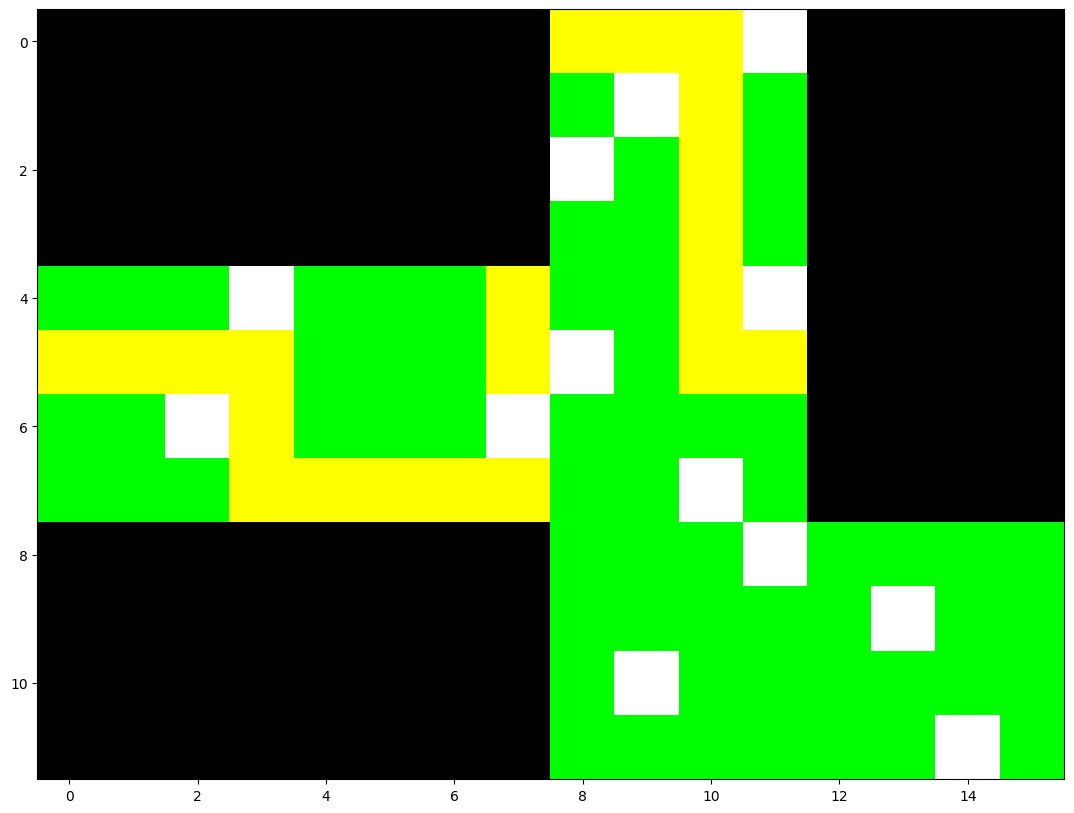

In [280]:
map_list = re.findall("\d{1,2}|\w{1}", map_)
for command in map_list:
    if re.match("\d+", command):
        step = int(command)
        mv.move(step)
    else:
        dir_ = command
        mv.new_direction(to = command)
    mv.square.draw_square()
    time.sleep(1)
    clear_output(wait=True)

In [281]:
mv.cur_pos

(5, 7)

In [282]:
mv.cur_direction

(0, 1)

In [284]:
1000*6*8+0

48000

In [153]:
mv.move(10)

In [154]:
mv.new_direction(to = "R")

In [155]:
mv.move(10)

In [156]:
mv.new_direction(to = "L")

In [157]:
mv.move(10)

In [158]:
mv.new_direction(to = "L")

In [163]:
mv.move(3)

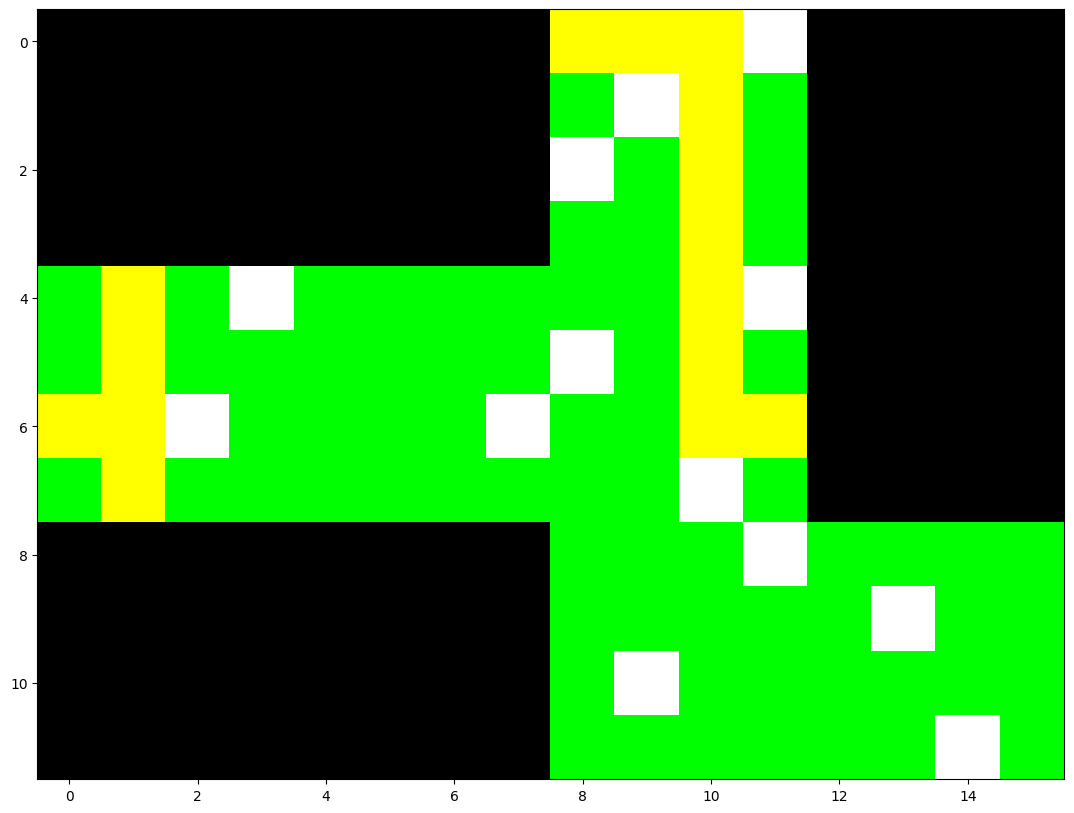

In [177]:
s0.draw_square()

In [18]:
mv.move(s0,2)

In [38]:
math.sin(math.radians(90))

1.0

In [59]:
def rotation_matrix(degree):
    degree = math.radians(degree)
    r_matrix = np.array([[np.cos(degree),-np.sin(degree)], [np.sin(degree), np.cos(degree)]])
    return r_matrix

In [68]:
class mover():
    def __init__(self, cur_direction = (1,0), cur_pos = (0,0)):
        self.cur_direction = cur_direction
        self.cur_pos = cur_pos
        
    def rotation_matrix(self, degree):
        degree = math.radians(degree)
        r_matrix = np.array([[np.cos(degree),-np.sin(degree)], [np.sin(degree), np.cos(degree)]])
        return r_matrix
    
    def new_direction(self, to = "R"):
        if to == "L":
            r_matrix = self.rotation_matrix(90)
            x, y = r_matrix.dot(np.array(self.cur_direction))
            self.cur_direction = (int(x),int(y))
        elif to == "R":
            r_matrix = self.rotation_matrix(270)
            x, y = r_matrix.dot(np.array(self.cur_direction))
            self.cur_direction = (int(x),int(y))
            

In [69]:
mv = mover()

In [70]:
mv.new_direction()

In [71]:
mv.cur_direction

(0, -1)

In [54]:
rmatrix = rotation_matrix(90)
rmatrix

array([[ 6.123234e-17, -1.000000e+00],
       [ 1.000000e+00,  6.123234e-17]])

In [43]:
vup = np.array((1,0)).T
vup

array([1, 0])

In [48]:
int(1e-10)

0

In [58]:
x , y = np.matmul(rmatrix,vup)


6.123233995736766e-17

In [45]:
rmatrix.dot(vup)

matrix([[6.123234e-17, 1.000000e+00]])

In [291]:
with open("22_input.txt", "r") as f:
    input_ = f.read()
square_input, command_input = input_.split("\n\n")
input_ = square_input.split("\n")

# I add extra spacing to the lines, that are shorter than the longest
max_length = max([len(x) for x in input_])
input_ = [(lambda x: x + (" " * (max_length - len(x))))(x) for x in input_]

In [292]:
input_ = square_input.split("\n")

# I add extra spacing to the lines, that are shorter than the longest
max_length = max([len(x) for x in input_])
input_ = [(lambda x: x + (" " * (max_length - len(x))))(x) for x in input_]
input_

['                                                  ........#...........................#............#............#..............#.....##...............',
 '                                                  .#..#...............................#..........##.#.........................#............#..........',
 '                                                  .......#...##...#..........#........................#.........#......................#..............',
 '                                                  .............................#..........#..#.#..........#...................#....................#..',
 '                                                  ...........#...........#...........#.......#....................#.......#........#..................',
 '                                                  #..#..........#........#..........................#....#.#..........................................',
 '                                                  .....#............

In [293]:
s1 = square(n_rows = len(input_), n_columns = max_length)

In [294]:
mv = mover(square=s1)

In [295]:
max_length

150

In [296]:
for n_row, row in enumerate(input_):
    for n_column, column in enumerate(row):
        if column == " ":
            color = [0,0,0]
        elif column == ".":
            color = [0,1,0]
        elif column == "#":
            color = [1,1,1]
        
        s1.add_cells(row = n_row, column = n_column, color = color)

In [297]:
map_list = re.findall("\d{1,2}|\w{1}", command_input.strip())

In [298]:
for command in map_list:
    if re.match("\d+", command):
        step = int(command)
        mv.move(step)
    else:
        dir_ = command
        mv.new_direction(to = command)
#     mv.square.draw_square()
#     time.sleep(0.2)
#     clear_output(wait=True)

In [299]:
1000*(mv.cur_pos[0]+1)+4*(mv.cur_pos[1]+1)+2

159034

In [300]:
mv.cur_direction

(0, -1)

In [301]:
mv.cur_pos[0]

158

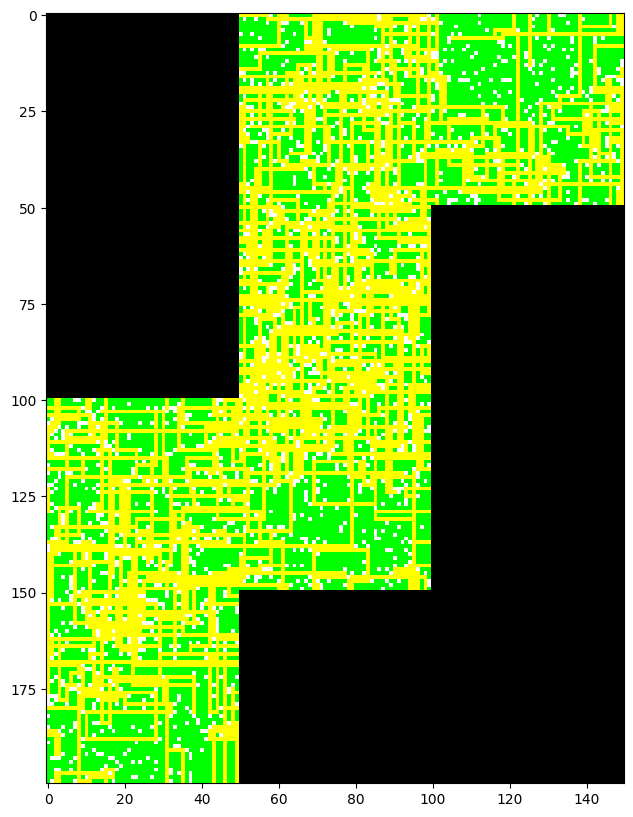

In [302]:
s1.draw_square(save = True)